<a href="https://colab.research.google.com/github/pkky/Projekty/blob/main/ProjektS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaprogramuj algorytm rozwiązujący modyfikację TSP, gdzie miasto startowe jest inne od końcowego, z pomocą ACO.

In [1]:
# biblioteka numeryczna
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt

# pomar czasu
import time

# skumulowana suma tablicy
from itertools import accumulate

from itertools import permutations

Problem TSP

In [2]:
n=10 # dla algorytmu mrówkowego

cities = np.array([[random.random(),random.random()] for i in range(n)]) # lista współrzędnych miast
cities

array([[0.51330917, 0.18807421],
       [0.28083696, 0.81703207],
       [0.98408828, 0.38989745],
       [0.18987765, 0.11300394],
       [0.22974693, 0.33544235],
       [0.07440093, 0.59014862],
       [0.44107163, 0.4282031 ],
       [0.60347631, 0.06904822],
       [0.74764557, 0.13907419],
       [0.64099753, 0.19986987]])

In [3]:
# odległość euklidesowa
def dist(i,j):
    return np.sqrt((cities[i,0]-cities[j,0])**2 + (cities[i,1]-cities[j,1])**2)

In [4]:
# długość drogi
def len_path(path): #path to dowolna ścieżka; daje długośc ścieżki łączącej miasta
    return sum([dist(path[i],path[i+1]) for i in range(n-1)])

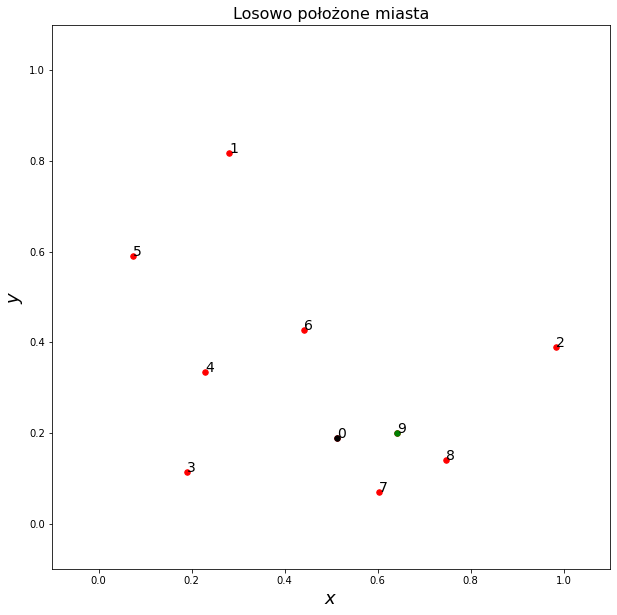

In [5]:
plo_cities=plt.figure(figsize=(10,10))
plt.title("Losowo położone miasta",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

plt.scatter(cities[:,0],cities[:,1],c='red', s=30)
plt.scatter(cities[0,0],cities[0,1],c='black',s=30)
plt.scatter(cities[n-1,0],cities[n-1,1],c='green',s=30)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);

In [6]:
x=n-1

In [7]:
# losowa droga - np.random.permutation 
# dodanie miasta 0 na początku i na końcu
sequence = np.insert(np.append(np.random.permutation(x-1)+1,n-1),0,0)  #sekwencja miast z losową permutacją
sequence

array([0, 4, 6, 3, 1, 5, 7, 8, 2, 9])

In [8]:
def len_path(path):
    return sum([dist(path[i],path[i+1]) for i in range(x)])

In [9]:
# powyżej była lista miast, teraz lista odpowiadających im współrzędnych
tour = np.array([cities[i] for i in sequence])
# porównaj wizualnie z powyższym rysunkiem
tour

array([[0.51330917, 0.18807421],
       [0.22974693, 0.33544235],
       [0.44107163, 0.4282031 ],
       [0.18987765, 0.11300394],
       [0.28083696, 0.81703207],
       [0.07440093, 0.59014862],
       [0.60347631, 0.06904822],
       [0.74764557, 0.13907419],
       [0.98408828, 0.38989745],
       [0.64099753, 0.19986987]])

In [10]:
cities[i]

array([0.64099753, 0.19986987])

In [11]:
cities[0]

array([0.51330917, 0.18807421])

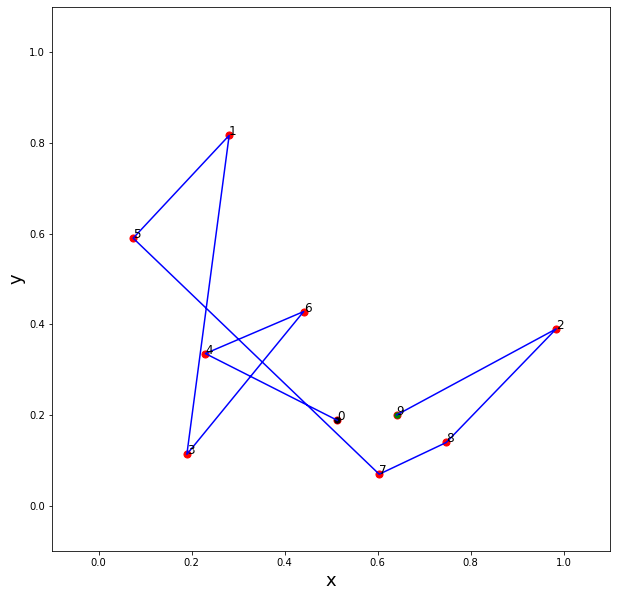

In [12]:
plt.figure(figsize=(10,10))

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.plot(tour[:,0],tour[:,1],c='blue')

plt.scatter(cities[:,0],cities[:,1],c='red',s=50)
plt.scatter(cities[0,0],cities[0,1],c='black',s=30)
plt.scatter(cities[n-1,0],cities[n-1,1],c='green',s=30)

for i in range(n):
    plt.annotate(i,(cities[i,0],cities[i,1]),fontsize=12)

plt.xlabel("x",fontsize=18)
plt.ylabel("y",fontsize=18);

In [13]:
sequence

array([0, 4, 6, 3, 1, 5, 7, 8, 2, 9])

In [14]:
sequence[0], sequence[1]

(0, 4)

In [15]:
dist(sequence[0],sequence[1])
# por. z powyższym rysunkiem

0.3195698887322344

In [16]:
lenpa=np.round(len_path(sequence),3) # zaokrąglenie
lenpa

3.61

ACO dla TSP

In [17]:
# tablica odległości między miastami
dis_tab = np.array([[dist(i,j) for i in range(n)] for j in range(n)])
np.round(dis_tab,2) # zaokrąglenie dla przejrzystości wydruku

array([[0.  , 0.67, 0.51, 0.33, 0.32, 0.6 , 0.25, 0.15, 0.24, 0.13],
       [0.67, 0.  , 0.82, 0.71, 0.48, 0.31, 0.42, 0.81, 0.82, 0.71],
       [0.51, 0.82, 0.  , 0.84, 0.76, 0.93, 0.54, 0.5 , 0.34, 0.39],
       [0.33, 0.71, 0.84, 0.  , 0.23, 0.49, 0.4 , 0.42, 0.56, 0.46],
       [0.32, 0.48, 0.76, 0.23, 0.  , 0.3 , 0.23, 0.46, 0.55, 0.43],
       [0.6 , 0.31, 0.93, 0.49, 0.3 , 0.  , 0.4 , 0.74, 0.81, 0.69],
       [0.25, 0.42, 0.54, 0.4 , 0.23, 0.4 , 0.  , 0.39, 0.42, 0.3 ],
       [0.15, 0.81, 0.5 , 0.42, 0.46, 0.74, 0.39, 0.  , 0.16, 0.14],
       [0.24, 0.82, 0.34, 0.56, 0.55, 0.81, 0.42, 0.16, 0.  , 0.12],
       [0.13, 0.71, 0.39, 0.46, 0.43, 0.69, 0.3 , 0.14, 0.12, 0.  ]])

In [18]:
# początkowa tablica feromonów - na razie wszędzie tyle samo!
fero = np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n)
fero

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.]])

In [19]:
# parametry modelu dot. prawdopodobieństwa wyboru drogi przez mrówkę

alpha = 1.15;
beta = 1;

h = 0.03; # szybkość uaktualniania śladów feromonowych
# po kolejnym etapie algorytmu feromony_nowe = (1-h) feromony_stare + h feromony_złożone

popsize = 10; # liczba mrówek "na trasie" w kolejnym etapie algorytmu

sc = n/popsize; # kontroluje, ile feromonu jest zostawiane = liczba miast/liczba mrówek

# odkładana przez mrówkę ilość feromonu to sc/długość odcinka

In [20]:
# Zwraca (losowo) miasto do odwiedzenia z listy miast togo, jeśli mrówka jest w mieście i.
# Stosujemu oczywiście naszą maszynke ind_prob.

def ac_next(i, togo):
    p = np.array([fero[i, j]**alpha/dis_tab[i, j]**beta for j in togo]) # wagi
    su = np.sum(p) # suma wag
    p = p/su # prawdopodobieństwa (wagi znormalizowane do 1)
    return togo[ind_prob(p)]

In [21]:
to_v = [i for i in range(1,n)] # miasta do odwiedzenia (na razie wszystkie)
to_v

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
# zebranie powyższych instrukcji w jedną funkcję
def ind_prob(tab_p):
    cum_p = np.array(list(accumulate(tab_p)))
    return np.sum(np.heaviside(random.random()-cum_p,0)).astype(int)

In [23]:
# tablica prawdopodobieństw
tab_p = np.array([0.5, 0.2, 0.1, 0.2])
cum_p = np.array(list(accumulate(tab_p)))
np.round(cum_p,2)

array([0.5, 0.7, 0.8, 1. ])

In [24]:
ind_prob(tab_p)

3

In [25]:
ac_next(0,to_v) # losowo wybrane kolejne miasto, jeśli mrówka jest w mieście 0

3

In [26]:
tt=[ac_next(0,to_v) for _ in range(10000)] # 10000 wyborów (na próbę)

In [27]:
# jeden etap algorytmu
# liczba pop mrówek wyrusza w trasę, każda z losowo wybranego miasta

def ac_one(pop):
    lm=10**10 # coś dużego - aktualna długość najlepszej trasy
    global fero2 # macierz "nowych" feromonów, które zostawią mrówki
    fero2=np.array([[0. for _ in range(n)] for _ in range(n)]) # inicjalizacja jako 0
    for mr in range(pop): # petla po mrówkach
        print()
        print("mrówka nr ",mr)
        print()
        pos=random.randint(0,n-1) # początkowe losowe miasto dla danej mrówki
        route=[pos] # dodanie miasta początkowego do trasy
        print(pos)
        to_v=[i for i in range(0,pos)]+[i for i in range(pos+1,n)] # miasta do odwiedzenia
        print(to_v)
        
        for _ in range(n-1): # pętla po liczbie miast do odwiedzenia
            pos=ac_next(pos,to_v) # nastepne miasto, wybrane wg prawdopodobieństwa ...
            route.append(pos) # dodanie tego miasta do trasy
            to_v.remove(pos)  # usunięcie z listy miast do odwiedzenia
            print(pos)
            print(to_v)
            
        route.append(route[0]) # dodanie na końcu trasy początkowego miasta 
          # (mrówka wraca do punktu startowego)    
        print(route)
        
        lr=len_path(route) # długość trasy
        print("obecna długość",lr)
        if lr<lm: # jeśli trasa jest krótsza od aktualnie najlepszej ... 
            lm=lr # ... to uaktualnij długość najkrótszej trasy ...
            r_opt=route # ... i zapamietaj ją jako r_opt
        print("najkrótsza długość",lm)    
            
    for i in range(n): # pozostawione feromony na każdym odcinku trasy
        fero2[r_opt[i],r_opt[i+1]]=fero2[r_opt[i],r_opt[i+1]]+sc/lm # w przód
        fero2[r_opt[i+1],r_opt[i]]=fero2[r_opt[i+1],r_opt[i]]+sc/lm # wspak
            # symetryzujemy dla symetrycznego problemu TSP - w ogólności nie musi tak być            
          
    return lm, r_opt # zwróć długość najkrótszej trasy i trasę
    

In [28]:
opt=ac_one(3) # działanie powyższego algorytmu dla 3 mrówek


mrówka nr  0

0
[1, 2, 3, 4, 5, 6, 7, 8, 9]
3
[1, 2, 4, 5, 6, 7, 8, 9]
4
[1, 2, 5, 6, 7, 8, 9]
9
[1, 2, 5, 6, 7, 8]
8
[1, 2, 5, 6, 7]
6
[1, 2, 5, 7]
5
[1, 2, 7]
2
[1, 7]
1
[7]
7
[]
[0, 3, 4, 9, 8, 6, 5, 2, 1, 7, 0]
obecna długość 4.504913465492589
najkrótsza długość 4.504913465492589

mrówka nr  1

1
[0, 2, 3, 4, 5, 6, 7, 8, 9]
9
[0, 2, 3, 4, 5, 6, 7, 8]
8
[0, 2, 3, 4, 5, 6, 7]
5
[0, 2, 3, 4, 6, 7]
7
[0, 2, 3, 4, 6]
6
[0, 2, 3, 4]
0
[2, 3, 4]
4
[2, 3]
3
[2]
2
[]
[1, 9, 8, 5, 7, 6, 0, 4, 3, 2, 1]
obecna długość 4.421894139538566
najkrótsza długość 4.421894139538566

mrówka nr  2

4
[0, 1, 2, 3, 5, 6, 7, 8, 9]
3
[0, 1, 2, 5, 6, 7, 8, 9]
7
[0, 1, 2, 5, 6, 8, 9]
6
[0, 1, 2, 5, 8, 9]
0
[1, 2, 5, 8, 9]
8
[1, 2, 5, 9]
9
[1, 2, 5]
2
[1, 5]
1
[5]
5
[]
[4, 3, 7, 6, 0, 8, 9, 2, 1, 5, 4]
obecna długość 3.1707504033156586
najkrótsza długość 3.1707504033156586


In [29]:
np.round(fero2,2) # złożone feromony 

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.32, 0.  ],
       [0.  , 0.  , 0.32, 0.  , 0.  , 0.32, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.32],
       [0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.  , 0.32, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.32, 0.  , 0.32, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.32, 0.  , 0.  , 0.32, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.32, 0.  , 0.  , 0.32, 0.  , 0.  , 0.  ],
       [0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.32],
       [0.  , 0.  , 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.32, 0.  ]])

In [30]:
opt # najkrótsza znaleziona trasa

(3.1707504033156586, [4, 3, 7, 6, 0, 8, 9, 2, 1, 5, 4])

In [31]:
# jeszcze raz parametry

alpha = 1.15;
beta = 1;
h = 0.03;
popsize = 10;
sc = n/popsize;

In [32]:
ac_one(2)


mrówka nr  0

1
[0, 2, 3, 4, 5, 6, 7, 8, 9]
5
[0, 2, 3, 4, 6, 7, 8, 9]
0
[2, 3, 4, 6, 7, 8, 9]
9
[2, 3, 4, 6, 7, 8]
3
[2, 4, 6, 7, 8]
6
[2, 4, 7, 8]
4
[2, 7, 8]
7
[2, 8]
8
[2]
2
[]
[1, 5, 0, 9, 3, 6, 4, 7, 8, 2, 1]
obecna długość 3.0873843500262974
najkrótsza długość 3.0873843500262974

mrówka nr  1

2
[0, 1, 3, 4, 5, 6, 7, 8, 9]
9
[0, 1, 3, 4, 5, 6, 7, 8]
8
[0, 1, 3, 4, 5, 6, 7]
7
[0, 1, 3, 4, 5, 6]
0
[1, 3, 4, 5, 6]
3
[1, 4, 5, 6]
4
[1, 5, 6]
5
[1, 6]
1
[6]
6
[]
[2, 9, 8, 7, 0, 3, 4, 5, 1, 6, 2]
obecna długość 2.4082087300300863
najkrótsza długość 2.4082087300300863


(2.4082087300300863, [2, 9, 8, 7, 0, 3, 4, 5, 1, 6, 2])

In [33]:
# cały algorytm mrówkowy dla TSP (10 linijek + 20 linijek kodu ac_one)

iter=200
# iter=10000 # liczba iteracji dla n=50

min_l=10**10 # coś dużego, początkowa długość najlepszej drogi (numeryczna nieskonczoność)
fero=np.array([[1. for _ in range(n)] for _ in range(n)])-np.identity(n) 
     # początkowa macierz feromonów

for k in range(iter):   # pętla po iteacjach
    opt=ac_one(popsize) # jeden "zespół" popsize mrówek na trasie

    if opt[0]<min_l: # jeśli znaleziona droga krótsza, uaktualnij ...
        min_l=opt[0] # ... jej długość ...
        best_route=opt[1] # ... i trasę
        print('zmiana w kroku ',k) # wydruk, by było widać, że optimum się zmienia
# ważne!         
    fero=(1-h)*fero+h*fero2 # uaktualnienie macierzy feromonów
        # parowanie "starego" feromonu, dodanie nowego

print()
print(min_l, best_route) # najlepsza trasa
print()
    
print(np.round(fero,2)) # końcowa macierz feromonów
    

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
7
[1, 2, 3, 4, 5, 6, 8, 9]
8
[1, 2, 3, 4, 5, 6, 9]
9
[1, 2, 3, 4, 5, 6]
2
[1, 3, 4, 5, 6]
4
[1, 3, 5, 6]
3
[1, 5, 6]
5
[1, 6]
1
[6]
6
[]
[0, 7, 8, 9, 2, 4, 3, 5, 1, 6, 0]
obecna długość 3.0250616391677534
najkrótsza długość 2.6758003634953207

mrówka nr  9

1
[0, 2, 3, 4, 5, 6, 7, 8, 9]
6
[0, 2, 3, 4, 5, 7, 8, 9]
0
[2, 3, 4, 5, 7, 8, 9]
9
[2, 3, 4, 5, 7, 8]
8
[2, 3, 4, 5, 7]
7
[2, 3, 4, 5]
3
[2, 4, 5]
4
[2, 5]
5
[2]
2
[]
[1, 6, 0, 9, 8, 7, 3, 4, 5, 2, 1]
obecna długość 2.954297783461452
najkrótsza długość 2.6758003634953207

mrówka nr  0

2
[0, 1, 3, 4, 5, 6, 7, 8, 9]
8
[0, 1, 3, 4, 5, 6, 7, 9]
7
[0, 1, 3, 4, 5, 6, 9]
9
[0, 1, 3, 4, 5, 6]
0
[1, 3, 4, 5, 6]
3
[1, 4, 5, 6]
4
[1, 5, 6]
6
[1, 5]
1
[5]
5
[]
[2, 8, 7, 9, 0, 3, 4, 6, 1, 5, 2]
obecna długość 2.2853979689821395
najkrótsza długość 2.2853979689821395

mrówka nr  1

3
[0, 1, 2, 4, 5, 6, 7, 8, 9]
2
[0, 1, 4, 5, 6, 7, 8, 9]
8
[0, 1, 4, 5, 6, 7, 9]
7
[0, 1, 4, 5, 6, 9]


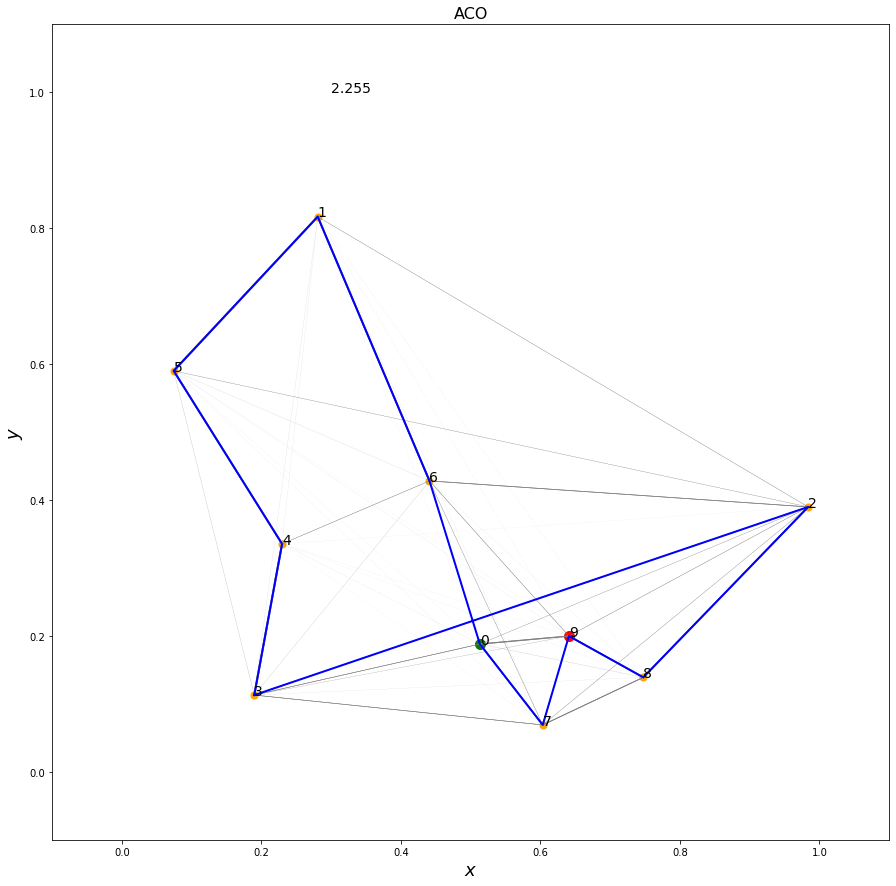

In [34]:
plo_mro=plt.figure(figsize=(15,15))
plt.title("ACO",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)

# grafika ilustrujaca gęstość feromonów poprzez grubość linii
for i in range(n):
    for j in range(n):
        plt.plot([cities[i,0],cities[j,0]],[cities[i,1],cities[j,1]],
                 c="gray",linewidth=5*fero[i,j]) # grubosć linii prop. do gestości feromonów

bb=np.array([cities[i] for i in best_route])
plt.plot(bb[:,0],bb[:,1],c='blue',linewidth=2)

plt.scatter(cities[:,0],cities[:,1],c='orange', s=50)
plt.scatter(cities[0,0],cities[0,1],c='green',s=100)
plt.scatter(cities[n-1,0],cities[n-1,1],c='red',s=100)

for i in range(n):
    plt.annotate(i, (cities[i,0], cities[i,1]),fontsize=14)

mm=np.round(min_l,3)
plt.annotate(mm, (.3,1),fontsize=14)

plt.xlabel('$x$',fontsize=18)
plt.ylabel('$y$',fontsize=18);